In [ ]:
import gzip
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
from keras.datasets import mnist
(train_X, train_y), (test_X, test_y) = mnist.load_data()

In [ ]:
train_X = train_X/255.0
train_X =train_X.reshape(60000,784)

In [ ]:
test_X =  test_X / 255.0
test_X = test_X.reshape(10000,784)

In [ ]:
import matplotlib.pyplot as plt
class LinearReg:
    
    def __init__(self,learning_rate=0.0001,epochs=10000):
        self.epochs = epochs
        self.lr = learning_rate
        self.w = None
        self.b = None
        self.cost_list = []
        
    def __initial_params(self,shape):
        self.w = np.zeros(shape)
        self.b = 0
        return True
        
    def __predictions(self,X):
        return np.dot(X, self.w) + self.b
    
    def __calculate_cost(self,error):
        return (1/(2*error.size)) * np.dot(error.T,error)
    
    def __gradient_descent(self,X,y,y_pred):
        error = y_pred - y
        cost = self.__calculate_cost(error)
        self.cost_list.append(cost)
        dw = (1 / X.shape[0]) * np.dot(X.T,error)
        db = (1 / X.shape[0]) * np.sum(error)
        return dw, db
    
    def __update_parameters(self,dw,db):
       
        self.w -= self.lr * dw
        self.b -= self.lr * db
        return True
    
    def fit(self,X,y):
        self.__initial_params(X.shape[1])
        count= 0
        for _ in range(self.epochs):
            count = count +1
            y_pred = self.__predictions(X)
            dw, db,  = self.__gradient_descent(X, y, y_pred)
            self.__update_parameters(dw, db)
            print("Epoch-->", count,", Prediction--->",y_pred)
        return True
    
    def predict(self,X):
        return self.__predictions(X)
    
    def calculate_rmse(self,y_real,y_pred):
        return np.sqrt(np.mean((y_pred-y_real)**2))
    
    def plot_cost(self):
 
        plt.title('Cost Function J')
        plt.xlabel('No. of iterations')
        plt.ylabel('Cost')
        plt.plot(self.cost_list)
        plt.show()
        
    def calculate_r2(self,X,y):
        sum_squares = 0
        sum_residuals = 0
        y_mean = np.mean(y)
        for i in range(X.shape[0]):
            y_pred = self.__predictions(X[i])
            sum_squares += (y[i] - y_mean) ** 2
            sum_residuals += (y[i] - y_pred) ** 2
        score = 1- (sum_residuals / sum_squares)
        return score

In [ ]:
model = LinearReg()
model.fit(train_X,train_y)

Streaming output truncated to the last 5000 lines.
Epoch--> 5001 , Prediction---> [4.17497083 1.26346262 2.71509837 ... 5.23412218 2.12231945 3.70992253]
Epoch--> 5002 , Prediction---> [4.17496156 1.26320917 2.71513746 ... 5.23430778 2.12227246 3.71001724]
Epoch--> 5003 , Prediction---> [4.1749523  1.26295581 2.71517654 ... 5.23449334 2.12222549 3.71011194]
Epoch--> 5004 , Prediction---> [4.17494306 1.26270253 2.71521561 ... 5.23467887 2.12217855 3.71020665]
Epoch--> 5005 , Prediction---> [4.17493382 1.26244934 2.71525467 ... 5.23486435 2.12213165 3.71030136]
Epoch--> 5006 , Prediction---> [4.1749246  1.26219623 2.71529371 ... 5.2350498  2.12208477 3.71039606]
Epoch--> 5007 , Prediction---> [4.17491539 1.26194322 2.71533274 ... 5.23523522 2.12203791 3.71049076]
Epoch--> 5008 , Prediction---> [4.17490619 1.26169028 2.71537175 ... 5.2354206  2.12199109 3.71058547]
Epoch--> 5009 , Prediction---> [4.17489701 1.26143744 2.71541075 ... 5.23560594 2.12194429 3.71068017]
Epoch--> 5010 , Predic

True

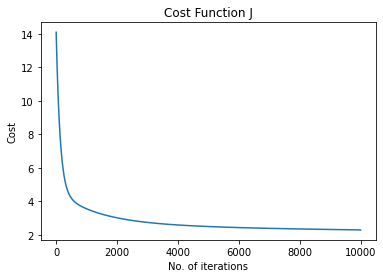

In [ ]:
model.plot_cost()

In [ ]:
model.calculate_rmse(test_y,model.predict(test_X)) 

2.0785733744219086

In [ ]:
for i in range(20):
        print("Image ID--->",round(model.predict(test_X[i]))," Corresponding Label--->",test_y[i])

Image ID---> 5  Corresponding Label---> 7
Image ID---> 1  Corresponding Label---> 2
Image ID---> 1  Corresponding Label---> 1
Image ID---> 3  Corresponding Label---> 0
Image ID---> 4  Corresponding Label---> 4
Image ID---> 2  Corresponding Label---> 1
Image ID---> 6  Corresponding Label---> 4
Image ID---> 6  Corresponding Label---> 9
Image ID---> 3  Corresponding Label---> 5
Image ID---> 8  Corresponding Label---> 9
Image ID---> -1  Corresponding Label---> 0
Image ID---> 2  Corresponding Label---> 6
Image ID---> 7  Corresponding Label---> 9
Image ID---> 2  Corresponding Label---> 0
Image ID---> 3  Corresponding Label---> 1
Image ID---> 2  Corresponding Label---> 5
Image ID---> 6  Corresponding Label---> 9
Image ID---> 4  Corresponding Label---> 7
Image ID---> 5  Corresponding Label---> 3
Image ID---> 5  Corresponding Label---> 4
